In [5]:
import pandas as pd
import numpy as np
import scipy.cluster
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
import fastcluster

In [6]:
dm = pd.read_csv('distance_matrix(100).csv', encoding='utf-8')
income = pd.read_csv('income_labeling.csv', encoding='utf-8').head(100)
data = income.iloc[:,2:].values
del dm['Unnamed: 0']
dm.values.shape

(100, 100)

In [18]:
clustering = fastcluster.ward(dm)
#scipy.cluster.hierarchy.dendrogram(clustering)
assignments = scipy.cluster.hierarchy.fcluster(clustering, 170, criterion="distance")

assignments

array([4, 4, 2, 4, 1, 4, 4, 3, 4, 4, 4, 1, 2, 4, 4, 3, 2, 4, 4, 2, 1, 4,
       1, 1, 4, 1, 2, 4, 3, 4, 1, 3, 3, 3, 1, 4, 3, 3, 1, 2, 1, 4, 1, 3,
       3, 4, 3, 3, 4, 4, 2, 3, 1, 3, 4, 3, 3, 1, 4, 4, 3, 3, 2, 2, 3, 3,
       4, 1, 4, 4, 1, 3, 3, 4, 3, 1, 3, 1, 3, 1, 2, 4, 4, 2, 1, 3, 3, 1,
       2, 2, 3, 3, 1, 4, 2, 2, 4, 2, 1, 1], dtype=int32)

In [26]:
Z = linkage(pdist(dm), method='ward', metric='euclidean')
pd.DataFrame(Z, columns=['row label 1','row label 2','distance','no'],
            index = ['cluster %d' % (i+1) for i in range(Z.shape[0])])

,row label 1,row label 2,distance,no
cluster 1,29.0,35.0,9.364694,2.0
cluster 2,13.0,27.0,10.343839,2.0
cluster 3,41.0,54.0,10.703504,2.0
cluster 4,59.0,100.0,10.922874,3.0
cluster 5,38.0,40.0,12.766950,2.0
...,...,...,...,...
cluster 95,189.0,190.0,157.186785,29.0
cluster 96,177.0,191.0,162.402060,32.0
cluster 97,192.0,193.0,199.801342,39.0
cluster 98,194.0,195.0,332.953007,61.0


In [4]:
arr_ = []
arr_.append([arr[x][0] for x in range(len(arr))])
cnt=0
for i in arr_[0]:
    if i==1:
        cnt = cnt+1
cnt

16

<ipython-input-5-2c602f604878>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = shc.dendrogram(shc.linkage(dm.values, method='ward'))


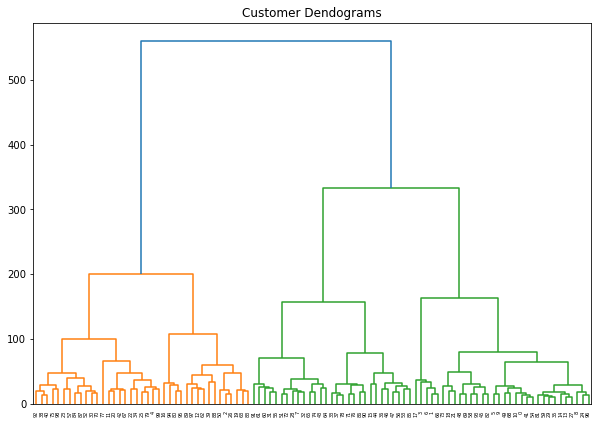

In [5]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(dm.values, method='ward'))

In [13]:
data

array([[1, 2, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [4, 4, 5, ..., 7, 7, 7],
       ...,
       [5, 5, 6, ..., 4, 4, 7],
       [4, 4, 4, ..., 4, 4, 4],
       [3, 3, 4, ..., 4, 5, 5]], dtype=int64)

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
ad_dm= cluster.fit_predict(data)
ad_dm

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 3, 0, 0, 1, 2, 0,
       2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 3, 0, 0, 1, 2, 0, 0, 2,
       1, 1, 0, 0, 2, 0, 3, 3, 0, 2, 2, 2], dtype=int64)

In [7]:
Y = pdist(data)
Z = ward(Y)
cl_array = fcluster(Z, 24, criterion='distance')
cl_array
cnt=0
for i in cl_array:
    if i==1:
        cnt = cnt+1
cnt

60

In [8]:
Y = pdist(dm)
Z = ward(Y)
cl_array = fcluster(Z, 170, criterion='distance')
cl_array

array([4, 4, 2, 4, 1, 4, 4, 3, 4, 4, 4, 1, 2, 4, 4, 3, 2, 4, 4, 2, 1, 4,
       1, 1, 4, 1, 2, 4, 3, 4, 1, 3, 3, 3, 1, 4, 3, 3, 1, 2, 1, 4, 1, 3,
       3, 4, 3, 3, 4, 4, 2, 3, 1, 3, 4, 3, 3, 1, 4, 4, 3, 3, 2, 2, 3, 3,
       4, 1, 4, 4, 1, 3, 3, 4, 3, 1, 3, 1, 3, 1, 2, 4, 4, 2, 1, 3, 3, 1,
       2, 2, 3, 3, 1, 4, 2, 2, 4, 2, 1, 1], dtype=int32)

In [9]:
y_income= pd.read_csv('y_income.csv')
y_income

,pid,p061703,p071703,p081703,p091703,p101703,p111703,p121703,p131703,p141703,p151703,p161703,p171703,p181703,p191703,p201703,p211703
0,201,500.0,720.0,840.0,1080.0,960.0,1200.0,1000.0,560.0,1088.0,1032.0,1220.0,1272.0,1310.0,1190.0,1550.0,1550.0
1,202,600.0,648.0,660.0,660.0,660.0,684.0,610.0,630.0,716.0,795.0,920.0,936.0,900.0,1090.0,1140.0,1134.0
2,401,2900.0,3800.0,3840.0,3860.0,4008.0,4008.0,3600.0,4800.0,5400.0,4800.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
3,402,720.0,1000.0,500.0,2960.0,1080.0,1080.0,1200.0,960.0,600.0,960.0,960.0,960.0,960.0,960.0,960.0,960.0
4,902,2640.0,2760.0,2904.0,3356.0,2916.0,2950.0,3800.0,3600.0,4100.0,3200.0,5500.0,3400.0,5500.0,4800.0,700.0,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,610902,1800.0,2120.0,2380.0,3240.0,3420.0,3600.0,3600.0,3330.0,5760.0,5160.0,4868.0,4560.0,5400.0,4800.0,4350.0,4800.0
1506,611402,1800.0,1920.0,2376.0,1650.0,3000.0,4200.0,3530.0,4800.0,9600.0,6000.0,4800.0,3900.0,1200.0,2280.0,2400.0,3500.0
1507,611702,1620.0,1776.0,600.0,3000.0,2820.0,4800.0,3600.0,4800.0,4200.0,8000.0,6000.0,6300.0,6400.0,9500.0,6000.0,7000.0
1508,613002,1800.0,2160.0,2376.0,1980.0,2400.0,2400.0,1800.0,1800.0,2400.0,1150.0,3120.0,3360.0,3000.0,3000.0,3240.0,3420.0


In [10]:
idx_1 = []
idx_2 = []
idx_3 = []
idx_4 = []
#idx_x 는 각 클러스터에 속하는 index를 저장하기 위한 array
for i in range(len(cl_array)):
    if cl_array[i]==1:
        idx_1.append(i)
    elif cl_array[i]==2:
        idx_2.append(i)
    elif cl_array[i]==3:
        idx_3.append(i)
    else:
        idx_4.append(i)
cluster_1 = y_income.iloc[idx_1]
cluster_2 = y_income.iloc[idx_2]
cluster_3 = y_income.iloc[idx_3]
cluster_4 = y_income.iloc[idx_4]

In [11]:
len(cluster_1)

23

In [12]:
#1번 집단에 속한 사람들의 pid를 가져오기 위해선
#y_income.iloc[idx_1]['pid']
#각 집단의 대학 졸업 체크
k21 = pd.read_excel("klips21p.xlsx")
sample = k21.loc[:,['pid','p210110']]
sample['pid'] = sample['pid'].astype('str')
sample = sample.set_index('pid')
sample['pid'] = sample.index

cl1 = sample[sample['pid'].isin(y_income.iloc[idx_1]['pid'].values)]
cl2 = sample[sample['pid'].isin(y_income.iloc[idx_2]['pid'].values)]
cl3 = sample[sample['pid'].isin(y_income.iloc[idx_3]['pid'].values)]
cl4 = sample[sample['pid'].isin(y_income.iloc[idx_4]['pid'].values)]

cl1_5 = cl1[cl1['p210110']==5]
len(cl1_5)

0

In [13]:
len(cluster_5)

NameError: name 'cluster_5' is not defined

,p210110,pid
pid,,
15502,7,15502
24301,7,24301
30302,7,30302
38103,7,38103
43901,7,43901


In [84]:
sample[sample['p215231']==2]

,p215231,pid
pid,,
2204,2.0,2204
12504,2.0,12504
15604,2.0,15604
17305,2.0,17305
23903,2.0,23903
...,...,...
10135702,2.0,10135702
10138104,2.0,10138104
11011502,2.0,11011502


In [77]:
y_income.iloc[idx_1]['pid'].values

array(['401', '6302', '10404', '10902', '11302', '11502', '12803',
       '14203', '17301', '19401', '20301', '21001', '26701', '30501',
       '30502', '32802', '35304', '40001', '40101', '41502', '41801',
       '42601', '43002', '43501', '44101', '45701', '45802', '47001',
       '47301', '47302'], dtype=object)

In [28]:
sampley_income.iloc[idx_1]['pid']

2        401
12      6302
16     10404
17     10902
19     11302
20     11502
23     12803
26     14203
34     17301
38     19401
39     20301
40     21001
53     26701
63     30501
64     30502
71     32802
76     35304
80     40001
81     40101
84     41502
85     41801
88     42601
89     43002
90     43501
93     44101
95     45701
96     45802
98     47001
99     47301
100    47302
Name: pid, dtype: int64

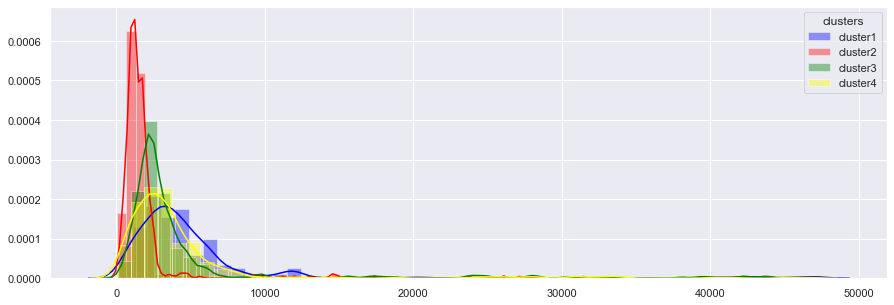

In [13]:
import seaborn as sns, numpy as np
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(15,5)})
sns.distplot(cluster_1, color="blue", label="cluster1")
sns.distplot(cluster_2, color="red", label="cluster2")
sns.distplot(cluster_3, color="green", label="cluster3")
sns.distplot(cluster_4, color='yellow', label='cluster4')
plt.legend(title="clusters")
plt.show()

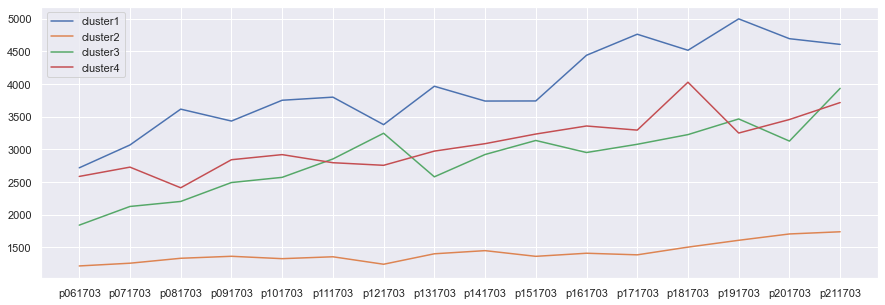

In [20]:
plt.plot(cluster_1.mean()[1:], label='cluster1')
plt.plot(cluster_2.mean()[1:], label='cluster2')
plt.plot(cluster_3.mean()[1:], label='cluster3')
plt.plot(cluster_4.mean()[1:], label='cluster4')
plt.legend(loc='best')